In [1]:
import geopandas as gp
import pandas as pd
import os
import json
import pylab as pl
s = json.load( open(os.getenv('PUI2015')+'/fbb_matplotlibrc.json') )
pl.rcParams.update(s)

%pylab inline
%pylab inline

Populating the interactive namespace from numpy and matplotlib
Populating the interactive namespace from numpy and matplotlib


/usr/local/Library/anaconda/lib/python2.7/site-packages/matplotlib/__init__.py:855: UserWarning: svg.embed_char_paths is deprecated and replaced with svg.fonttype; please use the latter.
  warnings.warn(self.msg_depr % (key, alt_key))


In [11]:
nrg = gp.GeoDataFrame.from_csv("Energy_and_Water_Data_Disclosure_for_Local_Law_84__2013_.csv")
bsize = gp.GeoDataFrame.from_file("Manhattan/MNMapPLUTO.shp")

In [12]:
print nrg.columns
nrgminimal = nrg[['NYC Borough, Block, and Lot (BBL)', 'Co-reported BBL Status']]

print nrgminimal
print bsize.columns

Index([u'NYC Borough, Block, and Lot (BBL)', u'Co-reported BBL Status',
       u'BBLs Co-reported',
       u'Reported NYC Building Identificaiton Numbers (BINs)',
       u'Street Number', u'Street Name', u'Borough', u'Zip Code',
       u'DOF Benchmarking Submission Status', u'Site EUI(kBtu/ft2)',
       u'Weather Normalized Site EUI(kBtu/ft2)', u'Source EUI(kBtu/ft2)',
       u'Weather Normalized Source EUI(kBtu/ft2)',
       u'Municipally Supplied Potable Water - Indoor Intensity (gal/ft²)',
       u'Automatic Water Benchmarking Eligible', u'Reported Water Method',
       u'ENERGY STAR Score', u'Total GHG Emissions(MtCO2e)',
       u'Direct GHG Emissions(MtCO2e)', u'Indirect GHG Emissions(MtCO2e)',
       u'Reported Property Floor Area (Building(s)) (ft²)',
       u'DOF Property Floor Area (Buildngs and Parking)(ft2)',
       u'Primary Property Type - Self Selected', u'DOF Number of Buildings'],
      dtype='object')
               NYC Borough, Block, and Lot (BBL) Co-reported BBL Sta

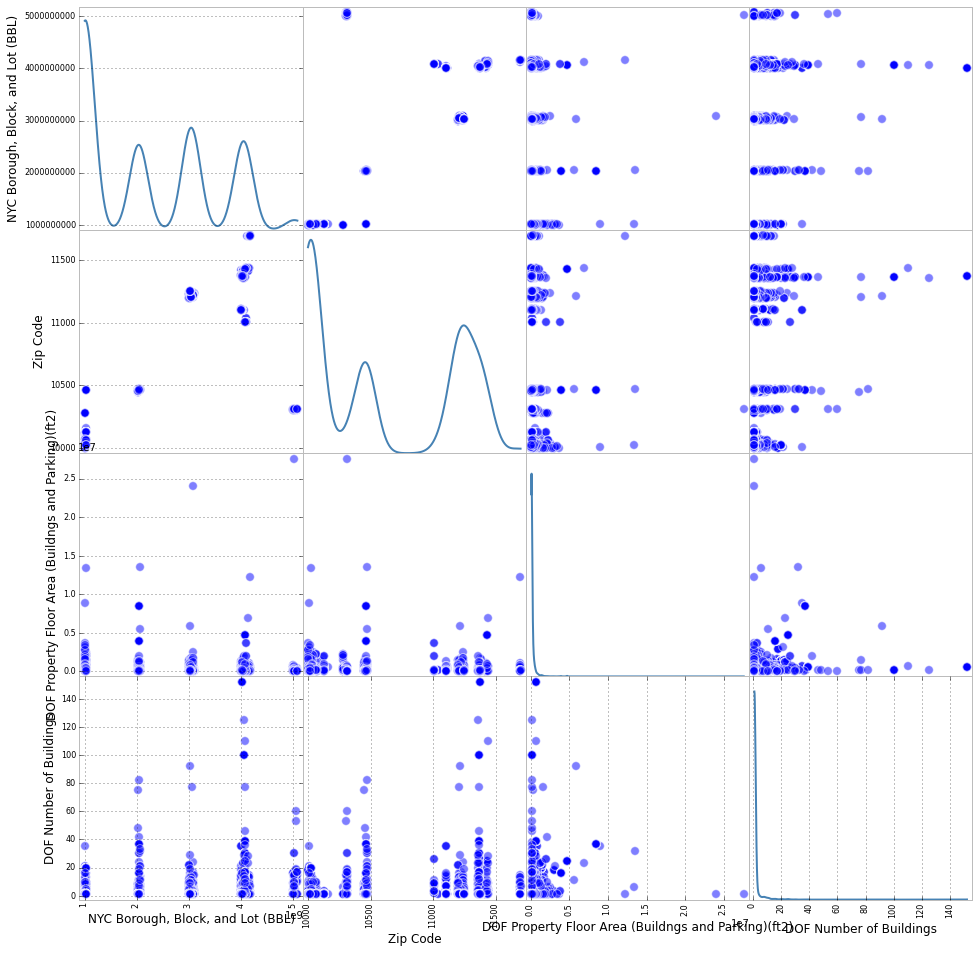

In [13]:
from pandas.tools.plotting import scatter_matrix
scatter_matrix (nrg, s=300, figsize=(16, 16), diagonal='kde')

nrg['BBL'] = nrg['NYC Borough, Block, and Lot (BBL)'] 

In [14]:
#print nrg.columns, size.columns
#nrg.nrg = 
#print nrg.BBL ,size.BBL
def canconvert(mydata):
    try :
        float(mydata)
        return True
    except ValueError:
        return False
        
indx=(np.vectorize(canconvert)(nrg['Site EUI(kBtu/ft2)']))
print indx
nrg['Site EUI(kBtu/ft2)'][~indx]=float('NaN')
indx=( np.vectorize(canconvert)(nrg['Reported Property Floor Area (Building(s)) (ft²)']))
nrg['Reported Property Floor Area (Building(s)) (ft²)'][~indx]=float('NaN')
print nrg['Reported Property Floor Area (Building(s)) (ft²)'].astype(float)
print nrg['Site EUI(kBtu/ft2)'].astype(float)
#for i in nrg['Reported Property Floor Area (Building(s)) (ft²)']:
##    print i
#    print type(i)
indx=('Not Available' == nrg['Reported Property Floor Area (Building(s)) (ft²)'])
nrg['Reported Property Floor Area (Building(s)) (ft²)'][indx]=float('NaN')
print nrg['Reported Property Floor Area (Building(s)) (ft²)'].astype(float)*nrg['Site EUI(kBtu/ft2)'].astype(float)

[ True  True  True ...,  True  True  True]
Record Number
16099     91968
500      235370
5017      64806
5116      62839
363       98000
6876      53275
10714     61846
1214     204417
1544      60110
1905     457946
2301     511001
15059     56442
674       60939
2537      78435
2841      80293
2945     104990
15120    528180
3053     440895
4233      69656
4777      62300
4912      64838
5210      80917
5295      62205
1575     292061
15025     66000
4208     509100
4799      56170
1568      76430
5427      76992
5476      72000
          ...  
14559       NaN
14560       NaN
14748       NaN
14753       NaN
13582       NaN
13947       NaN
14777       NaN
14779       NaN
14409       NaN
13262       NaN
13261       NaN
12523       NaN
12529       NaN
12536       NaN
13929       NaN
13944       NaN
13945       NaN
13821       NaN
13829       NaN
13837       NaN
13838       NaN
13847       NaN
14352       NaN
12976       NaN
12978       NaN
12984       NaN
12987       NaN
12988       NaN

/usr/local/Library/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/usr/local/Library/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/usr/local/Library/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy



Record Number
16099      180.5
500         82.1
5017       137.7
5116       103.2
363         74.0
6876        36.4
10714      114.8
1214       130.0
1544       138.3
1905     56909.0
2301        88.2
15059       15.7
674          NaN
2537        85.7
2841       195.7
2945        79.1
15120      144.1
3053       200.9
4233       104.6
4777        86.7
4912       102.1
5210        21.2
5295        78.3
1575         NaN
15025       55.2
4208        83.2
4799       145.1
1568        59.4
5427        88.7
5476       100.8
          ...   
14559        NaN
14560        NaN
14748        NaN
14753        NaN
13582        NaN
13947        NaN
14777        NaN
14779        NaN
14409        NaN
13262        NaN
13261        NaN
12523        NaN
12529        NaN
12536        NaN
13929        NaN
13944        NaN
13945        NaN
13821        NaN
13829        NaN
13837        NaN
13838        NaN
13847        NaN
14352        NaN
12976        NaN
12978        NaN
12984        NaN
12987        NaN

In [15]:
s1 = pd.merge(nrg, bsize, how='inner', on=['BBL'])
print s1.columns

/usr/local/Library/anaconda/lib/python2.7/site-packages/pandas/core/index.py:1695: UnicodeWarning: Unicode equal comparison failed to convert both arguments to Unicode - interpreting them as being unequal
  indexer = self._engine.get_indexer(target.values)
/usr/local/Library/anaconda/lib/python2.7/site-packages/pandas/core/index.py:1049: UnicodeWarning: Unicode equal comparison failed to convert both arguments to Unicode - interpreting them as being unequal
  return key in self._engine


Index([                  u'NYC Borough, Block, and Lot (BBL)',
                                    u'Co-reported BBL Status',
                                          u'BBLs Co-reported',
       u'Reported NYC Building Identificaiton Numbers (BINs)',
                                             u'Street Number',
                                               u'Street Name',
                                                 u'Borough_x',
                                                  u'Zip Code',
                        u'DOF Benchmarking Submission Status',
                                        u'Site EUI(kBtu/ft2)', 
       ...
                                                u'YearAlter2',
                                                 u'YearBuilt',
                                                    u'ZMCode',
                                                   u'ZipCode',
                                                 u'ZoneDist1',
                                           

/usr/local/Library/anaconda/lib/python2.7/site-packages/pandas/core/index.py:1572: UnicodeWarning: Unicode equal comparison failed to convert both arguments to Unicode - interpreting them as being unequal
  return self._engine.get_loc(_values_from_object(key))


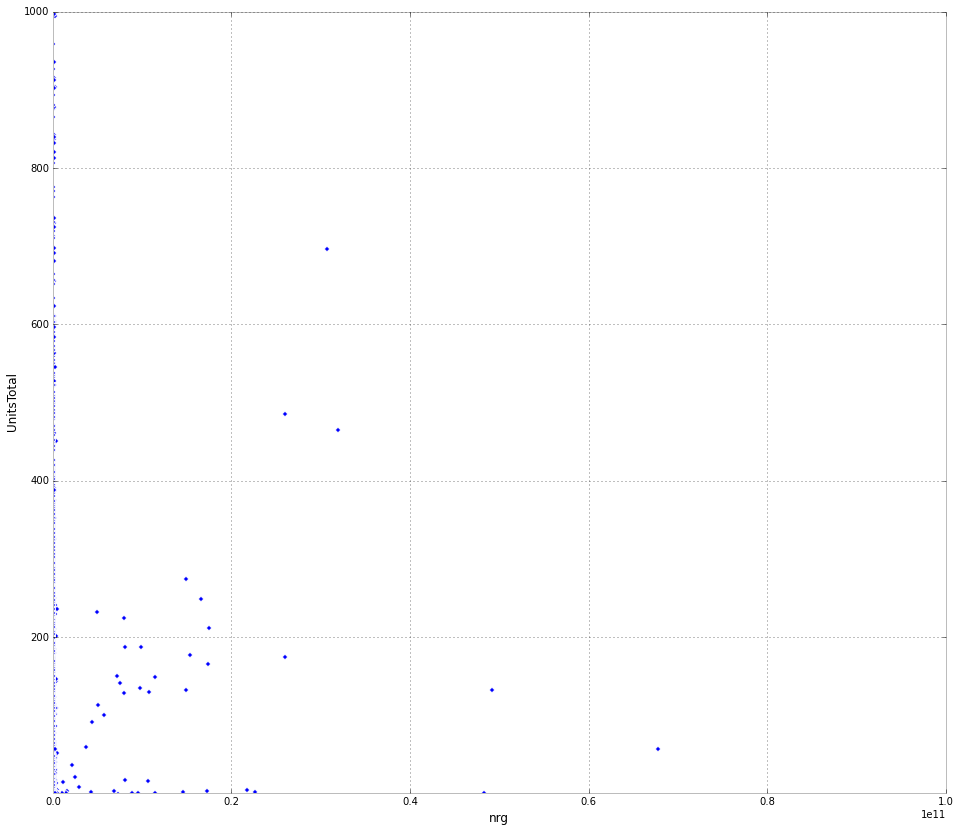

In [16]:
s1['nrg'] = s1['Reported Property Floor Area (Building(s)) (ft²)'].astype(float)*s1['Site EUI(kBtu/ft2)'].astype(float)
fig = figure(figsize=(15,15))
'''
indx= s1.UnitsTotal>1000
s1['UnitsTotal'][indx]=float('NaN')
indx= s1.UnitsTotal>1000
s1['UnitsTotal'][indx]=float('NaN')
'''
s1.plot(kind='scatter',x='nrg',y='UnitsTotal', marker='o', figsize=(16, 14),  xlim=(1000,1e11), ylim=(1,1000))


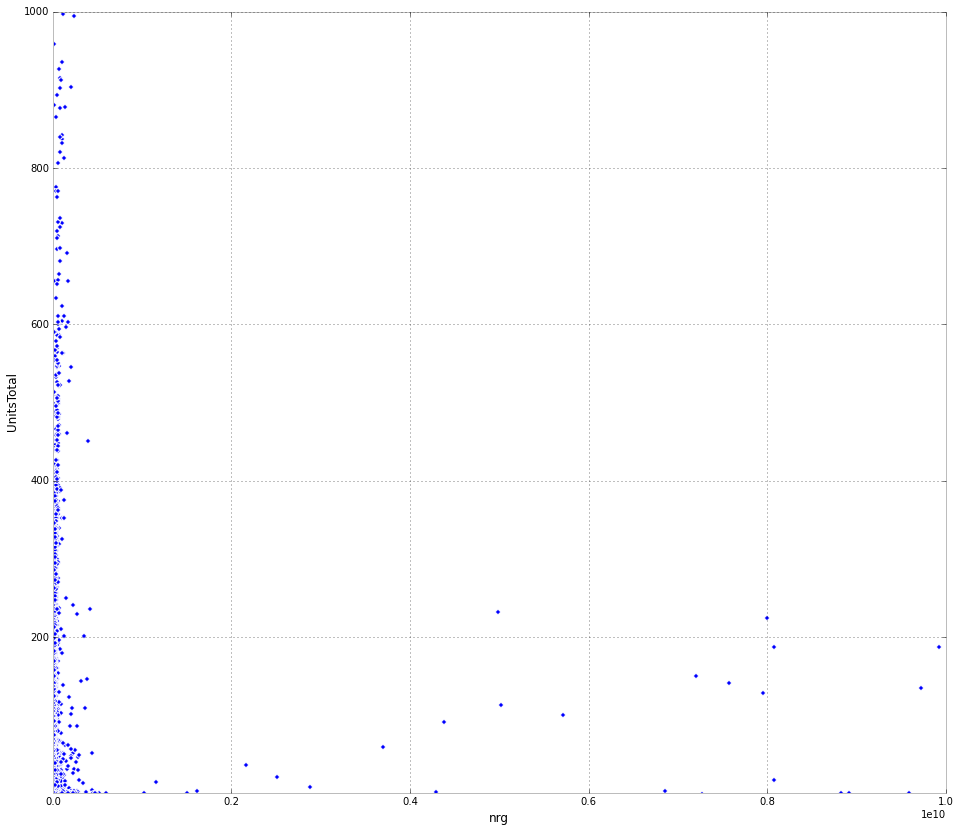

In [17]:
s1.plot(kind='scatter',x='nrg',y='UnitsTotal', marker='o',  figsize=(16, 14),   xlim=(1000,1e10), ylim=(1,1000))


/usr/local/Library/anaconda/lib/python2.7/site-packages/pandas/computation/expressions.py:190: UserWarning: evaluating in Python space because the '*' operator is not supported by numexpr for the bool dtype, use '&' instead
  unsupported[op_str]))


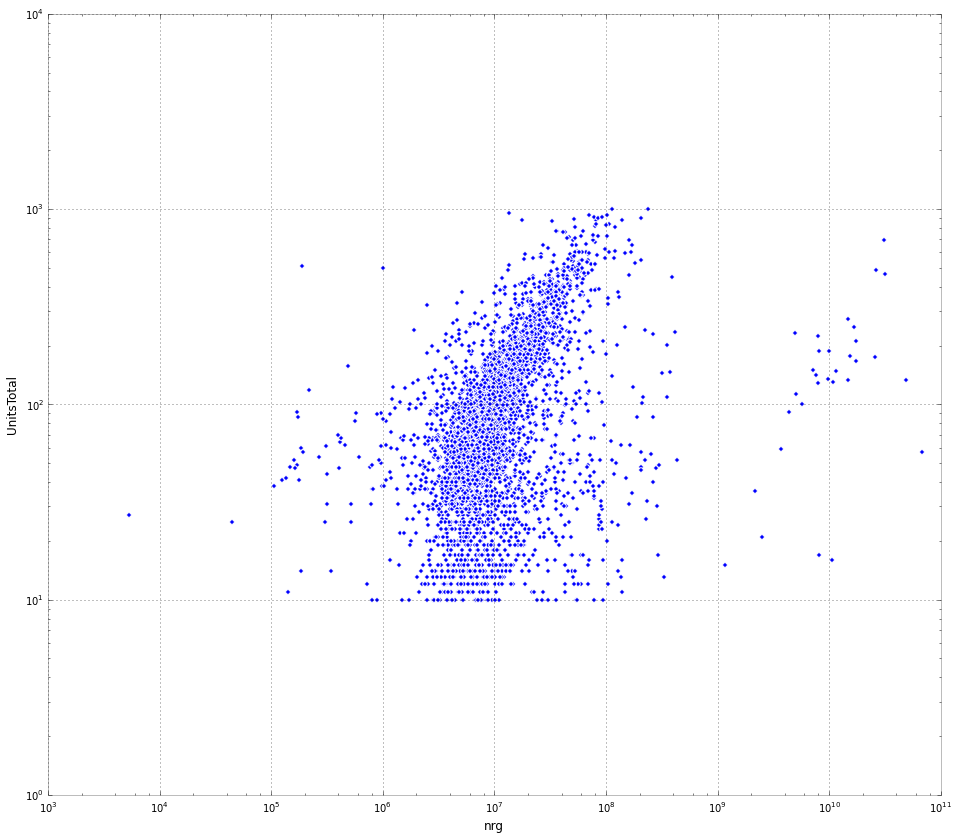

In [18]:
s2= s1[(s1.nrg > 1000) * (s1.nrg < 1e11) * (s1.UnitsTotal>=10) * (s1.UnitsTotal<1000)]

s2.plot(kind='scatter',x='nrg',y='UnitsTotal', marker='o',  figsize=(16, 14), loglog=True)

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    nrg   R-squared:                       0.166
Model:                            OLS   Adj. R-squared:                  0.166
Method:                 Least Squares   F-statistic:                     841.4
Date:                Tue, 06 Oct 2015   Prob (F-statistic):          6.57e-169
Time:                        17:58:40   Log-Likelihood:                -6080.9
No. Observations:                4238   AIC:                         1.217e+04
Df Residuals:                    4236   BIC:                         1.218e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
const         14.0384      0.076    185.618      0.000        13.890    14.187
UnitsTotal     0.4943      0.017     29.007      0.000         0.461     0.528
==============================================================================
Omnibus:                     2285.610   Durbin-Watson:                   1.668
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            45896.861
Skew:                           2.131   Prob(JB):                         0.00
Kurtosis:                      18.549   Cond. No.                         22.6
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

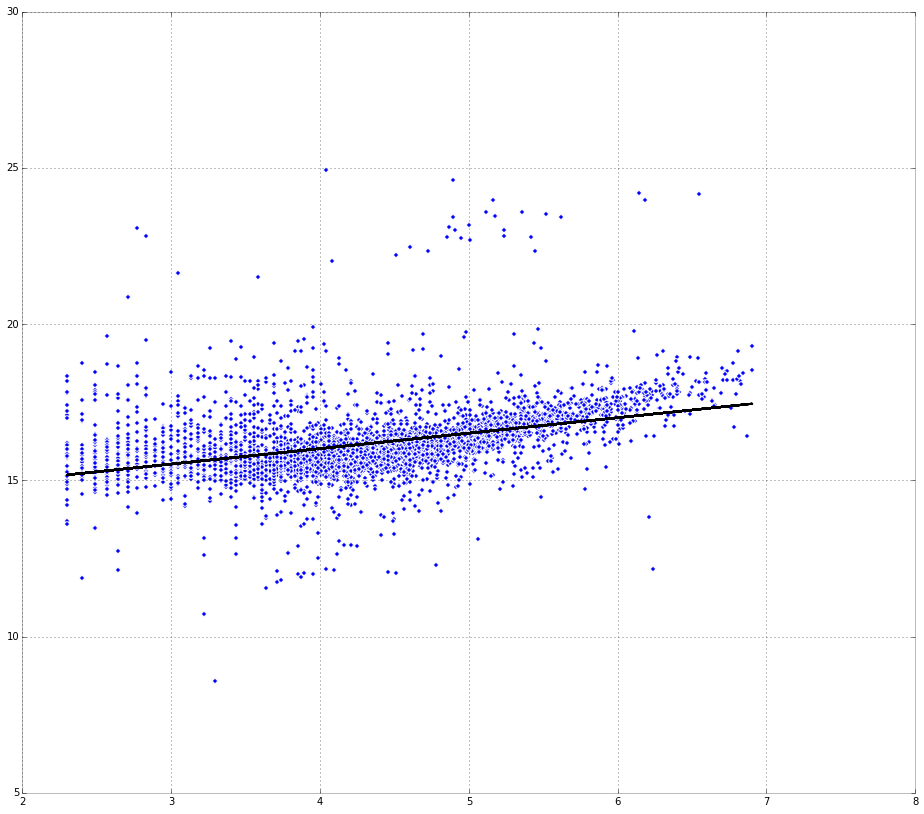

In [19]:
import statsmodels.api as sm
def fit_line1( x, y):
    """Return slope, intercept of best fit line."""
    #print x
    X = sm.add_constant(x)
    #print X
    model = sm.OLS(y, X, missing='drop') # ignores entires where x or y is NaN
    fit = model.fit()
    return fit.params[1], fit.params[0], fit # could also return stderr in each via fit.bse
p1,p0,fit = fit_line1(np.log(s2.UnitsTotal),np.log(s2.nrg))
pl.figure(figsize=(16, 14))
pl.scatter(np.log(s2.UnitsTotal), np.log(s2.nrg))
plot(np.log(s2.UnitsTotal), fit.predict(), 'k')
#plot(s2.nrg, s2.nrg*p1+p0)
fit.summary()

const         14.062299
UnitsTotal     0.495928
dtype: float64


<class 'statsmodels.iolib.summary.Summary'>
"""
                            WLS Regression Results                            
==============================================================================
Dep. Variable:                    nrg   R-squared:                       0.161
Model:                            WLS   Adj. R-squared:                  0.160
Method:                 Least Squares   F-statistic:                     810.9
Date:                Tue, 06 Oct 2015   Prob (F-statistic):          2.31e-163
Time:                        17:58:40   Log-Likelihood:                -6199.7
No. Observations:                4238   AIC:                         1.240e+04
Df Residuals:                    4236   BIC:                         1.242e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
const         14.0623      0.078    181.366      0.000        13.910    14.214
UnitsTotal     0.4959      0.017     28.477      0.000         0.462     0.530
==============================================================================
Omnibus:                     2754.498   Durbin-Watson:                   1.685
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            67665.988
Skew:                           2.706   Prob(JB):                         0.00
Kurtosis:                      21.812   Cond. No.                         22.5
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

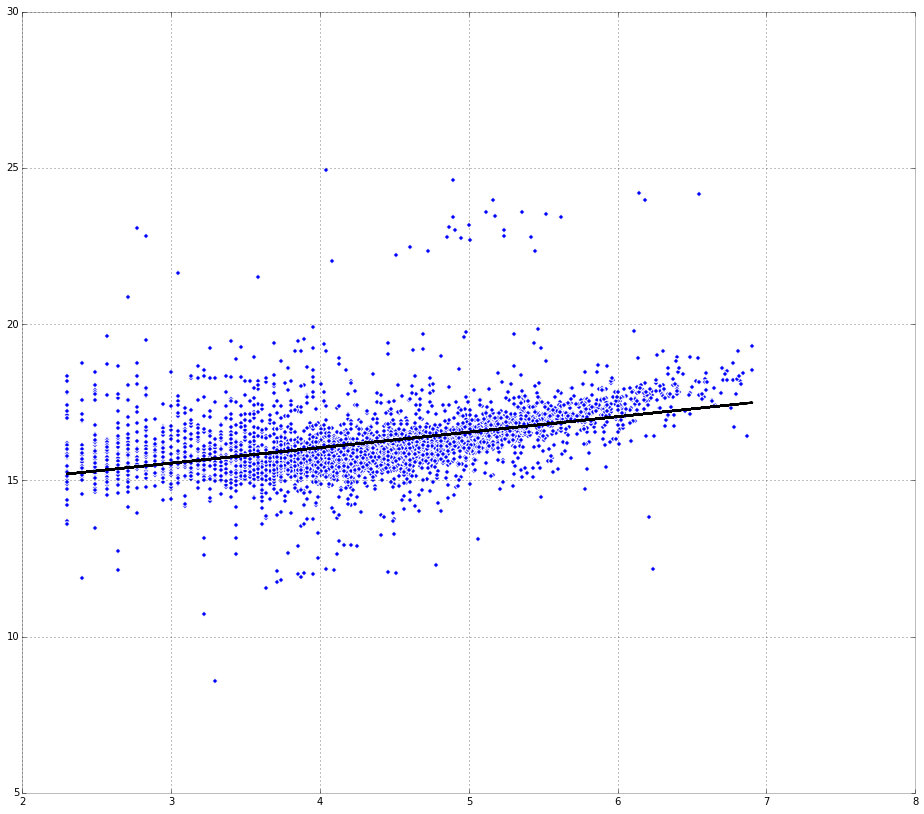

In [20]:
def fit_line2( x, y):
    """Return slope, intercept of best fit line."""
    #print x
    X = sm.add_constant(x)
    #print X
    model = sm.WLS(y, X, np.sqrt(y), missing='drop') # ignores entires where x or y is NaN
    fit = model.fit()
    print fit.params
    return fit.params[1], fit.params[0], fit # could also return stderr in each via fit.bse
p1,p0,fit2 = fit_line2(np.log(s2.UnitsTotal),np.log(s2.nrg))
pl.figure(figsize=(16, 14))
pl.scatter(np.log(s2.UnitsTotal), np.log(s2.nrg))
plot(np.log(s2.UnitsTotal), fit2.predict(), 'k')
#plot(s2.nrg, s2.nrg*p1+p0)
fit2.summary()

[[ 38931431.9697309   38311331.23926157  37696247.45391905 ...,
                 nan                nan                nan]
 [ 38330966.80179749  37715635.82809407  37105321.79951745 ...,
                 nan                nan                nan]
 [ 37735235.78045162  37124674.5635141   36519130.29170339 ...,
                 nan                nan                nan]
 ..., 
 [               nan                nan                nan ...,
                 nan                nan                nan]
 [               nan                nan                nan ...,
                 nan                nan                nan]
 [               nan                nan                nan ...,
                 nan                nan                nan]]
252.598001003


<matplotlib.colorbar.Colorbar instance at 0x126f2a128>

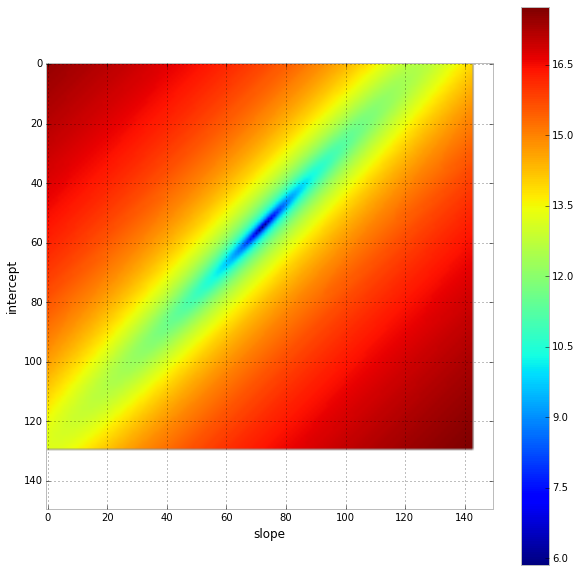

In [21]:
def residuals(model,data,error):
    return np.nansum(((data-model)/error)**2)

resids = np.ones((150,150))*float('NaN')
indxs = np.ones((150,150,2))
for i,l in enumerate(np.arange (-150, 240, 3)):
    #print i 
    for j,k in enumerate(np.arange(-50.0, 50.0, 0.7)):
        #print j
        indxs[i,j]=(l,k)
        resids[i,j]=residuals(np.log(s2.nrg), np.log(s2.UnitsTotal)*k+l,  np.sqrt(np.log(s2.nrg)))
        #print resids[i,j]
print resids
#print resids[~np.isnan(resids)].min(), indxs[np.where(resids==resids[~np.isnan(resids)].min())], np.where(resids==resids[~np.isnan(resids)].min())
print residuals( fit2.predict(),np.log(s2.nrg),np.sqrt(np.log(s2.nrg)))
pl.figure(figsize=(10,10))
pl.imshow(np.log(resids))
pl.xlabel('slope')
pl.ylabel('intercept')
pl.colorbar()

/usr/local/Library/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


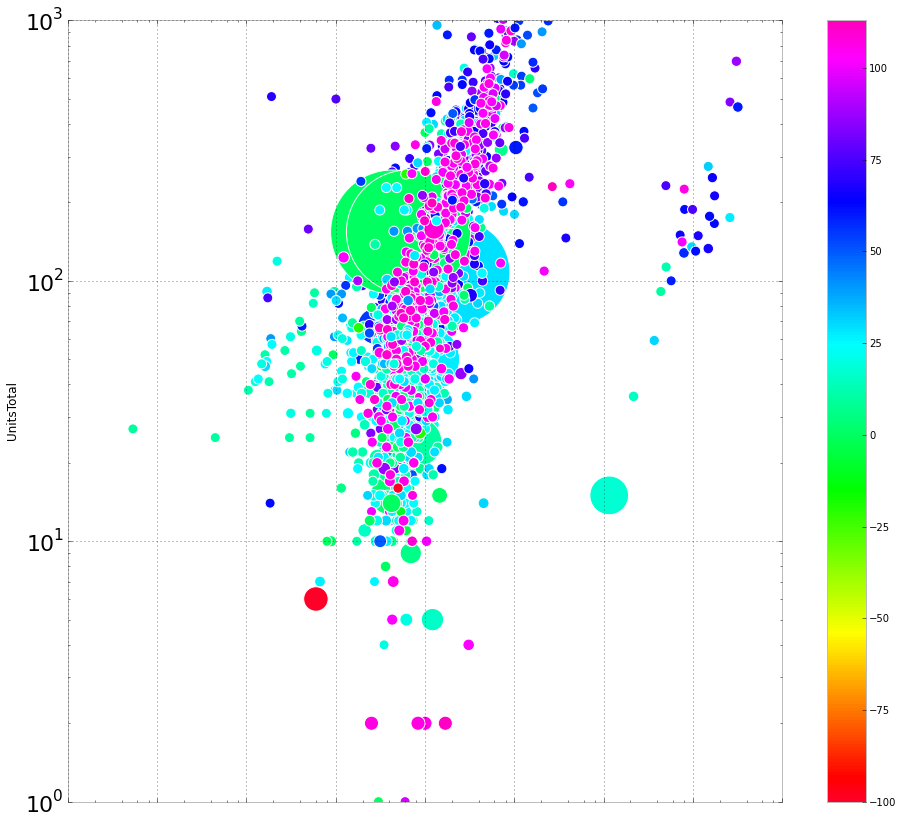

In [22]:
s1['YearBuilt'][s1['YearBuilt']<1800]=1800

s1.plot(kind='scatter',x='nrg',y='UnitsTotal', fontsize=22, colormap='gist_rainbow', alpha = 1, marker='o',  figsize=(16, 14), loglog=True,  xlim=(1000,1e11), ylim=(1,1000), c=s1['YearBuilt']-1900, s=s1['UnitsTotal']/s1['UnitsRes']*100)

-inf -inf
0        7.286094
1        6.950549
2        6.811909
3        6.860458
4        7.424460
5        6.919769
6       10.415995
7        7.653890
8        5.947502
9             NaN
10       6.827491
11       7.196269
12       6.919324
13       7.881446
14       7.947315
15       6.862490
16       6.732507
17       6.820855
18       6.234376
19       6.687587
20            NaN
21       6.561483
22       7.626926
23       6.911172
24       6.657050
25       6.693487
26       7.635853
27            NaN
28       7.136130
29            NaN
          ...    
6536          NaN
6537          NaN
6538          NaN
6539          NaN
6540          NaN
6541          NaN
6542          NaN
6543          NaN
6544          NaN
6545          NaN
6546          NaN
6547          NaN
6548          NaN
6549          NaN
6550          NaN
6551          NaN
6552          NaN
6553          NaN
6554          NaN
6555          NaN
6556          NaN
6557          NaN
6558          NaN
6559          NaN


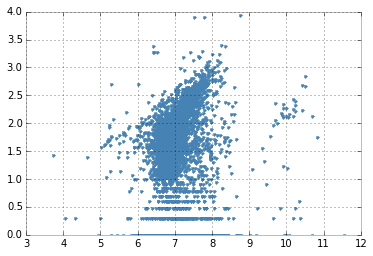

In [23]:
import statsmodels.api as sm

#print np.nanmean(np.log10(s1['nrg'])), np.nanmean(np.log10(s1['UnitsTotal']))
#print np.log10(s1['nrg'])

np.log10(s1['nrg'])[np.log10(s1['nrg'])<1e-9]=float('NaN')
np.log10(s1['UnitsTotal'])[np.log10(s1['UnitsTotal'])<1e-9]=float('NaN')
pl.plot(np.log10(s1['nrg']),np.log10(s1['UnitsTotal']),'.')
print np.nanmean(np.log10(s1['nrg'])), np.nanmean(np.log10(s1['UnitsTotal']))
print np.log10(s1['nrg'])
 
rm = sm.WLS(np.log10(s1['UnitsTotal']),np.log10(s1['nrg']), missing='drop')
model=rm.fit()
model.summary()
print "linear regression slope {}".format(model.params)
res=np.polyfit(np.log10(s1['nrg']),np.log10(s1['UnitsTotal']),1)

/usr/local/Library/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/usr/local/Library/anaconda/lib/python2.7/site-packages/pandas/core/generic.py:3636: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._update_inplace(new_data)
/usr/local/Library/anaconda/lib/python2.7/site-packages/IPython/core/interactiveshell.py:3066: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  exec(code_obj, self.user_global_ns, self.user_ns)

NumFloors
UnitsRes
UnitsTotal
YearBuilt
ZipCode
Weather Normalized Site EUI(kBtu/ft2)
Source EUI(kBtu/ft2)
ENERGY STAR Score
Total GHG Emissions(MtCO2e)


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x10ea5b050>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x1390ce710>]], dtype=object)

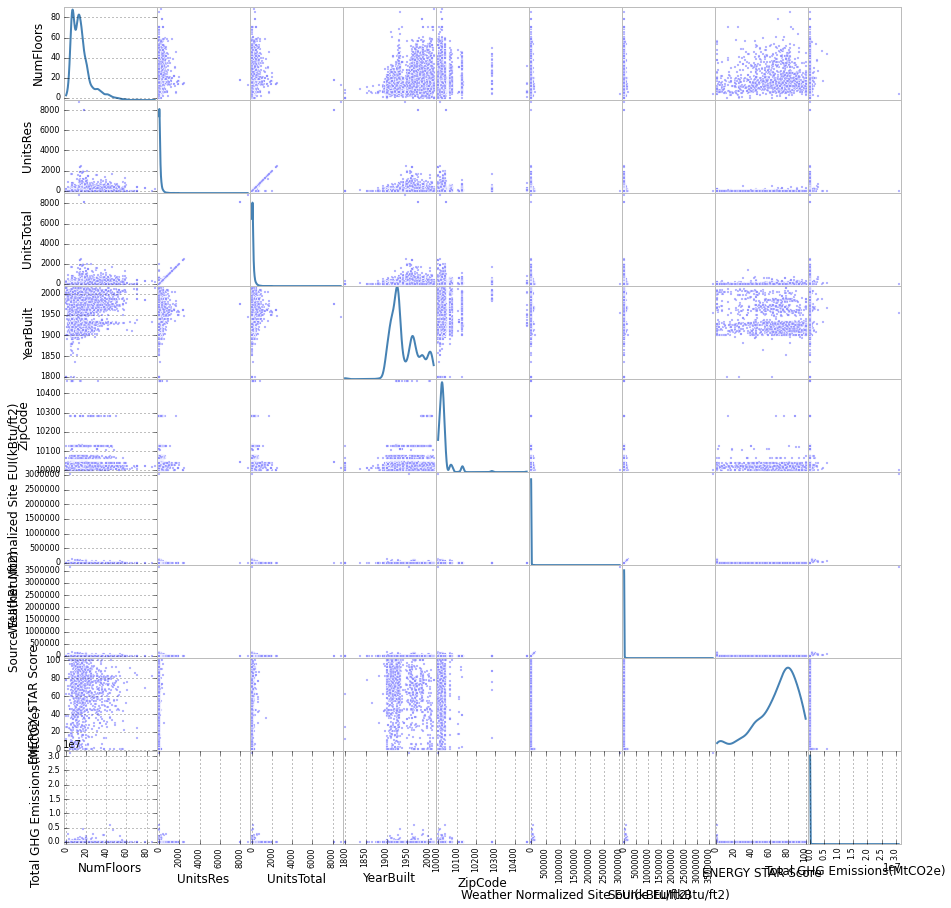

In [24]:
def strType(var):
    try:
        float(var)
        return True
    except:
        return False

scut = s1[[#'BBL','Co-reported BBL Status',
            #u'BldgFront',     u'BoroCode',   
             #u'HistDist',  u'LotArea',  
            u'NumFloors', #u'OfficeArea',   u'ResArea',  u'RetailArea',    
            u'UnitsRes',       u'UnitsTotal',  
           #u'YearAlter1', u'YearAlter2',  
               u'YearBuilt',   
              u'ZipCode','Weather Normalized Site EUI(kBtu/ft2)', 
            u'Source EUI(kBtu/ft2)', u'ENERGY STAR Score', u'Total GHG Emissions(MtCO2e)']]#,
               #u'Primary Property Type - Self Selected',   
            #u'BldgClass']]
for c in scut.columns:
    print c
    indx=np.array([ strType(tmp) for tmp in scut[c]])
    scut[c][~indx] = float('NaN')
    scut[c] = scut[c].astype(float)
from pandas.tools.plotting import scatter_matrix
scatter_matrix(scut, figsize=(15,15), diagonal='kde')
